In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as stats
from IPython.display import Image

# <font color='red'>Part 1: Probability vs Statistics</font> 

### What is Probability Theory?

* Probability Theory is a **mathematical** framework for computing the probability of complex events.

* Under the assumption that **we know the probabilities of the basic events.**

#### A simple (?) question
We all know that if one flips a fair coin then the outcome is "heads" or "tails" with equal probabilities.

What does that mean? 

It means that if we flip the coin $k$ times, for some large value of $k$, say $k=10,000$, 

Then the number of "heads" is **about** $\frac{k}{2}=\frac{10,000}{2} = 5,000$

#### Simulating coin flips

We will use the pseudo random number generators in `numpy` to simulate the coin flips. 

instead of "Heads" and "Tails" we will use $x_i=1$ or $x_i=-1$ and consider the sum $S_{10000} = x_1+x_2+\cdots+x_{10000}$.

If the number of heads is about 5,000 then $S_{10000}\approx 0$

We will vary the number of coin flips, which we denote by $k$

What do we mean by **about** ??

In [2]:
# Generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000, n=1000):
    X=2*(np.random.rand(k,n)>0.5)-1  
    # generate a (k,n) matrix of +-1 random numbers
    S= np.sum(X,axis=0) 
    return S 

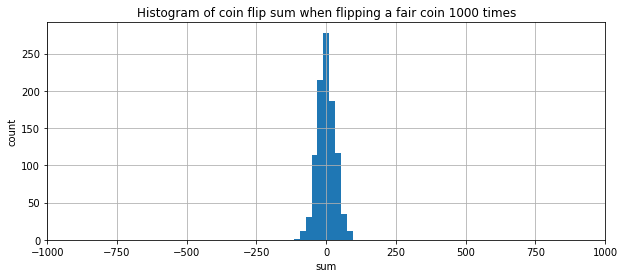

In [3]:
k=1000
n=1000
counts=generate_counts(k=k,n=n)
plt.figure(figsize=[10,4])
plt.hist(counts);
plt.xlim([-k,k])
plt.xlabel("sum")
plt.ylabel("count")
plt.title("Histogram of coin flip sum when flipping a fair coin %d times"%k)
plt.grid()

Note that the sum $S_{1000}$ is not **exactly** $0$, it is only **close to** $0$.

Using **probability theory** we can calculate **how small** is $\big|S_k\big|$

It can be shown that, if coin is a fair: 
$$ P \big( \big| S_k \big| \geq 4\sqrt{k} \big) < 2 \times 10^{-8}$$

### What is statistics?

Probability theory computes probabilities of complex events given the underlying base probabilities.

Statistics takes us in the opposite direction.

We are given **data** that was generated by a **Stochastic process**

We **infer** properties of the underlying base probabilities.

#### Example:  deciding whether a coin is biased.

In a previous example we discussed the distribution of the number of heads when flipping a fair coin many times.

Let's turn the question around: we flip a coin 1000 times and get 570 heads. 

Can we conclude that the coin is biased (not fair) ?

What can we conclude if we got 507 heads?

#### The Logic of Statistical inference
The answer uses the following logic.

* Suppose that the coin is fair. 

* Use **probability theory** to compute the probability of getting at least 570 (or 507) heads.

* If this probability is very small, then we can **reject** with confidence the hypothesis that the coin is fair.

#### Calculating the answer

We used $x_i=-1$ for tails and $x_i=+1$ for heads.

We looked at the sum $S_k=\sum_{i=1}^k x_i$, here $k=1000$.

If number of heads is $570$ then $S_{1000} = 570-430 = 140$  

It is very unlikely that $|S_{1000}| > 4\sqrt{k} \approx 126.5$

So it is very unlikely that the coin is unbiased (it is not a fair coin).

#### What about 507 heads?

507 heads = 493 tails $ \Rightarrow S_n = 14$,       $\;\;\;14 \ll 126.5$

We cannot conclude that coin is biased.

### Conclusion
The probability that an unbiased coin would generate a sequence with 570 or more heads is extremely small. From which we can conclude, with high confidence, that the coin **is** biased.

On the other hand, $\big| S_{1000} \big | \geq 507$ is quite likely. So getting 507 heads does not provide evidence that the coin is biased.

### Summary

Note that in the first example the random process is fully known (probability of heads =
.5). The objective is to find the probability of a certain outcome arising
from the random process. In the second example, the outcome is known (570 heads) and the
objective is to illuminate the unknown random process (the probability of heads and deciding whether a coin is biased).

Statistics is about analyzing real-world data and drawing conclusions.

#### In Machine Lereaning we mainly will deal with Statistical inferenece

# <font color='red'>Part 2: Statistics with Python</font> 

### a) Warmup

A ***random variable*** assigns a number to each outcome in a sample space. More formally:

**Definition**: Let $Ω$ be a sample space. A random variable is a function $X : Ω → R$

If $Ω$ is discrete, then random variable is called discrete random variable. 

If $Ω$ is continous, then random variable is called continous random variable.

* https://en.wikipedia.org/wiki/Random_variable

###### Discrete Random Variables

 * The probability mass function (**pmf**) of a discrete random variable is the function $p(a) = P (X = a)$ : pmf is a function that gives the probability that a discrete random variable is exactly equal to some value. https://en.wikipedia.org/wiki/Probability_mass_function
 
 
 * The cumulative distribution function (**cdf**) of a discrete random variable $X$ is the function $F$ given by $F (a) = P (X ≤ a)$ : cdf, evaluated at $a$ is the probability that $X$ will take a value less than or equal $a$.
https://en.wikipedia.org/wiki/Cumulative_distribution_function

###### Contionous Random Variables

 * The probability density function (**pdf**), is a function, whose value at any given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample. In a more precise sense, the **pdf** is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable’s **pdf** over that range—that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. $$P (c ≤ X ≤ d) = \int_{c}^{d} pdf (x) dx.$$
https://en.wikipedia.org/wiki/Probability_density_function
 
 
 * The cumulative distribution function (**cdf**) of a continous random variable $X$ is defined in exactly the same way as the **cdf** of a discrete random variable: $F (a) = P (X ≤ a)$. $$cdf(b) = P(X ≤ b) = \int_{-\infty}^{b} pdf (x) dx.$$
 
    https://en.wikipedia.org/wiki/Cumulative_distribution_function

Please note than when we say that *random variable has distribution $F(x)$* it means that it has $ cdf(x) = F(x)$.

###### Low of Large Numbers

In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

**Law of Large Numbers.**  Let $\lbrace X_1,X_2,\ldots,\rbrace$ be an
iid set of random variables. Suppose that $\mu=\mathbb{E}\vert
X_i\vert<\infty$, then $$\overline{X}_n \overset{as}{\to} \mu \text{ or }\  {\displaystyle \Pr \!\left(\lim _{n\to \infty }{\bar {X}}_{n}=\mu \right)=1.}$$

* https://en.wikipedia.org/wiki/Law_of_large_numbers

###### Central Limit Theorem

Although the Law of Large Numbers tells us
that the distribution of $\overline{X}_n$ becomes concentrated around $\mu$, it
does not tell us what that distribution is. The Central Limit Theorem (CLT)
says that $\overline{X}_n$ has a distribution that is approximately Normal
with mean $\mu$ and variance $\sigma^2/n$. Amazingly, nothing is assumed
about the distribution of $X_i$, except the existence
of the mean and variance.

**Central Limit Theorem.** Let $\lbrace X_1,X_2,\ldots,X_n \rbrace$ be iid with mean $\mu$ and variance $\sigma^2$. Then,

$$
Z_n = \frac{\sqrt{n}(\overline{X}_n-\mu)}{\sigma} \overset{P}{\longrightarrow} Z\sim\mathcal{N}(0,1)
$$

* https://en.wikipedia.org/wiki/Central_limit_theorem

### b)  Descriptive statistics - Basic Metrics

* https://sydney.edu.au/stuserv/documents/maths_learning_centre/descstats2010web.pdf
* https://cosmologist.info/teaching/STAT/CHAP4.pdf
* http://www.indiana.edu/~educy520/sec6342/week_08/descriptive_stats_outline.pdf

When we deal with statistics, we usually work with a sample of the data rather than a full population. As you'll see later, this affects the way we use notation to indicate statistical measures; and in some cases we calculate statistics from a sample differently than from a full population to account for bias in the sample.

#### Measures of Central Tendency

* Mean
* Median
* Mode


The term *measures of central tendency* sounds a bit grand, but really it's just a fancy way of saying that we're interested in knowing where the middle value in our data is. For example, suppose decide to conduct a study into the comparative salaries of people who graduated from the same school. You might record the results like this:

| Name     | Salary      |
|----------|-------------|
| Dan      | 50,000      |
| Joann    | 54,000      |
| Pedro    | 50,000      |
| Rosie    | 189,000     |
| Ethan    | 55,000      |
| Vicky    | 40,000      |
| Frederic | 59,000      |

Now, some of the former-students may earn a lot, and others may earn less; but what's the salary in the middle of the range of all salaries?

#### Mean

A common way to define the central value is to use the *mean*, often called the *average*.
\begin{equation}\mu = \frac{\displaystyle\sum_{i=1}^{N}X_{i}}{N}\end{equation}

In Python, when working with data in a *pandas.dataframe*, you can use the ***mean*** function, like this:

In [5]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000, 54000, 50000, 189000, 55000, 40000, 59000]}, dtype=float)

In [6]:
df

,Name,Salary
0,Dan,50000.0
1,Joann,54000.0
2,Pedro,50000.0
3,Rosie,189000.0
4,Ethan,55000.0
5,Vicky,40000.0
6,Frederic,59000.0


In [7]:
print(df['Salary'].mean())

71000.0


So, is **71,000** really the central value? Or put another way, would it be reasonable for a graduate of this school to expect to earn $71,000? After all, that's the average salary of a graduate from this school.

If you look closely at the salaries, you can see that out of the seven former students, six earn less than the mean salary. The data is *skewed* by the fact that Rosie has clearly managed to find a much higher-paid job than her classmates.

#### Median
OK, let's see if we can find another definition for the central value that more closely reflects the expected earning potential of students attending our school. Another measure of central tendancy we can use is the *median*. To calculate the median, we need to sort the values into ascending order and then find the middle-most value. When there are an odd number of observations, you can find the position of the median value using this formula (where *n* is the number of observations):

\begin{equation}\frac{n+1}{2}\end{equation}

Remember that this formula returns the *position* of the median value in the sorted list; not the value itself.

If the number of observations is even, then things are a little (but not much) more complicated. In this case you calculate the median as the average of the two middle-most values, which are found like this:

\begin{equation}\frac{n}{2} \;\;\;\;and \;\;\;\; \frac{n}{2} + 1\end{equation}

There's an odd number of observation (7), so the median value is at position (7 + 1) &div; 2; in other words, position 4:

| Salary      |
|-------------|
| 40,000      |
| 50,000      |
| 50,000      |
|***>54,000*** |
| 55,000      |
| 59,000      |
| 189,000     |

So the median salary is **54,000**.

The *pandas.dataframe* class in Python has a ***median*** function to find the median:

In [9]:
print(df['Salary'].median())

54000.0


#### Mode
Another related statistic is the *mode*, which indicates the most frequently occurring value. If you think about it, this is potentially a good indicator of how much a student might expect to earn when they graduate from the school; out of all the salaries that are being earned by former students, the mode is earned by more than any other.

Looking at our list of salaries, there are two instances of former students earning **50,000**, but only one instance each for all other salaries:

| Salary      |
|-------------|
| 40,000      |
|***>50,000***|
|***>50,000***|
| 54,000      |
| 55,000      |
| 59,000      |
| 189,000     |

The mode is therefore **50,000**.

As you might expect, the *pandas.dataframe* class has a ***mode*** function to return the mode:

In [10]:
print(df['Salary'].mode())

0    50000.0
dtype: float64


### Measures of Dispersion

* Min
* Max
* Range
* Variance & Standard Deviation

#### Min & Max

The *pandas.dataframe* class has ***min*** and ***max*** functions to return these values.

In [11]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

print ('Min: ' + str(df['Salary'].min()))
print ('Mode: ' + str(df['Salary'].mode()[0]))
print ('Median: ' + str(df['Salary'].median()))
print ('Mean: ' + str(df['Salary'].mean()))
print ('Max: ' + str(df['Salary'].max()))

Min: 40000
Mode: 50000
Median: 54000.0
Mean: 71000.0
Max: 189000


We can examine these values, and get a sense for how the data is distributed - for example, we can see that the *mean* is closer to the max than the *median*, and that both are closer to the *min* than to the *max*.

However, it's generally easier to get a sense of the distribution by visualizing the data. Let's start by creating a histogram of the salaries, highlighting the *mean* and *median* salaries (the *min*, *max* are fairly self-evident, and the *mode* is wherever the highest bar is):

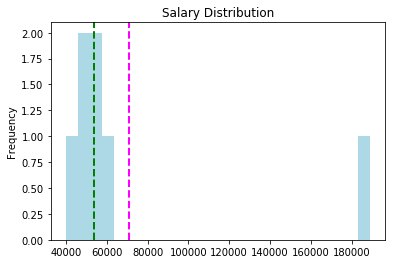

In [12]:
salary = df['Salary']
salary.plot.hist(title='Salary Distribution', color='lightblue', bins=25)  
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

The <span style="color:magenta">***mean***</span> and <span style="color:green">***median***</span> are shown as dashed lines. Note the following:
- *Salary* is a continuous data value - graduates could potentially earn any value along the scale, even down to a fraction of cent.
- The number of bins in the histogram determines the size of each salary band for which we're counting frequencies. Fewer bins means merging more individual salaries together to be counted as a group.
- The majority of the data is on the left side of the histogram, reflecting the fact that most graduates earn between 40,000 and 55,000
- The mean is a higher value than the median and mode.
- There are gaps in the histogram for salary bands that nobody earns.

The histogram shows the relative frequency of each salary band, based on the number of bins. It also gives us a sense of the *density* of the data for each point on the salary scale. With enough data points, and small enough bins, we could view this density as a line that shows the shape of the data distribution.

Run the following cell to show the density of the salary data as a line on top of the histogram:

#### Range
A simple way to quantify the variance in a dataset is to identify the difference between the lowest and highest values. This is called the *range*, and is calculated by subtracting the minimim value from the maximum value.

In [3]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

numcols = ['Salary', 'Hours', 'Grade']
for col in numcols:
    print(df[col].name + ' range: ' + str(df[col].max() - df[col].min()))

Salary range: 149000
Hours range: 11
Grade range: 90


#### Variance and Standard Deviation

Variance is measured as the average of the squared difference from the mean. For a full population, it's indicated by a squared Greek letter *sigma* (***&sigma;<sup>2</sup>***) and calculated like this:

\begin{equation}\sigma^{2} = \frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}\end{equation}

For a sample, it's indicated as ***s<sup>2</sup>*** calculated like this:

\begin{equation}s^{2} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}\end{equation}

In both cases, we sum the difference between the individual data values and the mean and square the result. Then, for a full population we just divide by the number of data items to get the average. When using a sample, we divide by the total number of items **minus 1** to correct for sample bias.

* https://en.wikipedia.org/wiki/Variance
* https://en.wikipedia.org/wiki/Bessel%27s_correction
* http://mortada.net/computing-sample-variance-why-divide-by-n-1.html

When we have a sample from the whole population and want to estimate population variance, then we have to use population mean $\mu$. If we do not know it, then we have to estimate it also by $\overline {x}$. In this case by using the sample mean instead of the true mean, you are underestimating each $x_{i} − µ$ by $\overline {x} − \mu$. We know that the variance of a sum is the sum of the variances (for uncorrelated variables). So, to find the discrepancy between the biased estimator and the true variance, we just need to find the variance of 
$\overline{x} − \mu$.

This is just the variance of the sample mean, which is $\sigma^2/n$. So, we expect that the biased estimator underestimates $\sigma^2$ by $\sigma^2/n$, and so the biased estimator = (1 − 1/n) × the unbiased estimator = (n − 1)/n × the unbiased estimator.


\begin{aligned}\operatorname {E} \left[\sigma ^{2}-s_{\text{biased}}^{2}\right]&=\operatorname {E} \left[{\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}-{\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}\right]\\&={\frac {1}{n}}\operatorname {E} \left[\sum _{i=1}^{n}\left((x_{i}^{2}-2x_{i}\mu +\mu ^{2})-(x_{i}^{2}-2x_{i}{\overline {x}}+{\overline {x}}^{2})\right)\right]\\&=\operatorname {E} \left[\mu ^{2}-{\overline {x}}^{2}+{\frac {1}{n}}\sum _{i=1}^{n}(2x_{i}({\overline {x}}-\mu ))\right]\\&=\operatorname {E} \left[\mu ^{2}-{\overline {x}}^{2}+2({\overline {x}}-\mu ){\overline {x}}\right]\\&=\operatorname {E} \left[\mu ^{2}-2{\overline {x}}\mu +{\overline {x}}^{2}\right]\\&=\operatorname {E} \left[({\overline {x}}-\mu )^{2}\right]\\&=\operatorname {Var} ({\overline {x}})\\&={\frac {\sigma ^{2}}{n}}\end{aligned}

So, the expected value of the biased estimator will be

$$\operatorname {E} \left[s_{\text{biased}}^{2}\right]=\sigma ^{2}-{\frac {\sigma ^{2}}{n}}={\frac {n-1}{n}}\sigma ^{2}$$

So, an unbiased estimator should be given by 
$$s_{\text{unbiased}}^{2}={\frac {n}{n-1}}s_{\text{biased}}^{2}$$




In [15]:
print(df['Grade'].var())

685.6190476190476


To get the measure of variance back into the same unit of measurement, we need to find its square root:

\begin{equation}std = \sqrt{variance} \end{equation}

This measure is called *standard deviation*.

In [16]:
print(df['Grade'].std())

26.184328282754315


#### Co-Variance 

Covariance as a measure of the (average) co-variation between two variables, say x and y. Covariance describes both how far the variables are spread out, and the nature of their relationship, Covariance is a measure of how much two variables change together. Compare this to Variance, which is just the range over which one measure (or variable) varies.

* https://en.wikipedia.org/wiki/Covariance

$$\operatorname {cov} (X,Y)=\operatorname {E} {{\big [}(X-\operatorname {E} [X])(Y-\operatorname {E} [Y]){\big ]}}$$

In [7]:
df_sal_grade = df[['Salary', 'Grade']]

In [8]:
df_sal_grade.cov()

,Salary,Grade
Salary,2.742667e+09,1.117500e+06
Grade,1.117500e+06,6.856190e+02


#### Correlation

Extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.


$$\rho _{X,Y}={\frac {\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})]}{\sigma _{X}\sigma _{Y}}}$$

In [9]:
df_sal_grade.corr()

,Salary,Grade
Salary,1.000000,0.814929
Grade,0.814929,1.000000


#### Skewness and Kurtosis

* https://en.wikipedia.org/wiki/Kurtosis
* https://en.wikipedia.org/wiki/Skewness
* https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

You can measure *skewness* (in which direction the data is skewed and to what degree) and kurtosis (how "peaked" the data is) to get an idea of the shape of the data distribution. In Python, you can use the ***skew*** and ***kurt*** functions to find this:

2.57316410755049
6.719828837773431


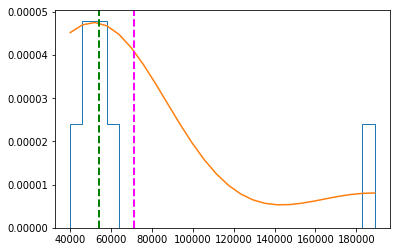

In [11]:

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

print(df['Salary'].skew())
print(df['Salary'].kurt())

salary = df['Salary']
density = stats.gaussian_kde(salary)
n, x, _ = plt.hist(salary, histtype='step', normed=True, bins=25)  
plt.plot(x, density(x)*5)
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Note that the density line takes the form of an asymmetric curve that has a "peak" on the left and a long tail on the right. We describe this sort of data distribution as being *skewed*; that is, the data is not distributed symmetrically but "bunched together" on one side. In this case, the data is bunched together on the left, creating a long tail on the right; and is described as being *right-skewed* because some infrequently occurring high values are pulling the *mean* to the right.

Let's take a look at another set of data.

-1.194570307262883
0.9412265624999989


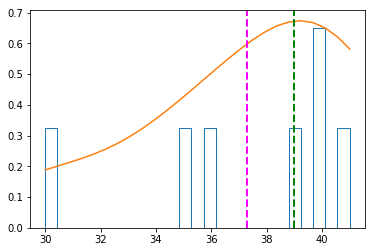

In [12]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

print(df['Hours'].skew())
print(df['Hours'].kurt())

hours = df['Hours']
density = stats.gaussian_kde(hours)
n, x, _ = plt.hist(hours, histtype='step', normed=True, bins=25)  
plt.plot(x, density(x)*7)
plt.axvline(hours.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(hours.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Once again, the distribution is skewed, but this time it's **left-skewed**. Note that the curve is asymmetric with the <span style="color:magenta">***mean***</span> to the left of the <span style="color:green">***median***</span> and the *mode*; and the average weekly working hours skewed to the lower end.

-0.06512433009682762
2.7484764913773034


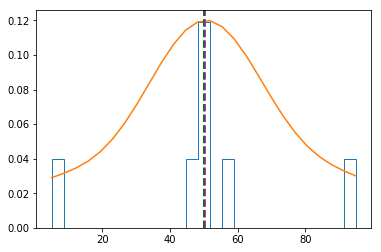

In [13]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Grade':[50,50,46,95,50,5,57]})

print(df['Grade'].skew())
print(df['Grade'].kurt())

grade = df['Grade']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, histtype='step', normed=True, bins=25)  
plt.plot(x, density(x)*7.5)
plt.axvline(grade.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(grade.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

This time, the distribution is symmetric, forming a "bell-shaped" curve. The <span style="color:magenta">***mean***</span>, <span style="color:green">***median***</span>, and mode are at the same location, and the data tails off evenly on both sides from a central peak.

This is a most likely ***normal*** distribution, and it occurs quite commonly in many scenarios due to the ***Central Limit Theorem***, which reflects the way continuous probability works.

Now let's look at the distribution of a real dataset - let's see how the heights of the father's measured in Galton's study of parent and child heights are distributed:

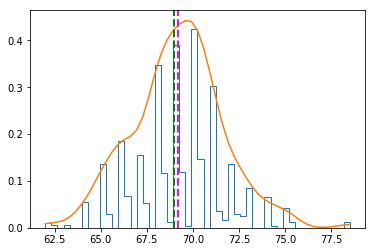

In [20]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

fathers = df['father']
density = stats.gaussian_kde(fathers)
n, x, _ = plt.hist(fathers, histtype='step', normed=True, bins=50)  
plt.plot(x, density(x)*2.5)
plt.axvline(fathers.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(fathers.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

As you can see, the father's height measurements are approximately normally distributed - in other words, they form a more or less *normal* distribution that is symmetric around the mean.

### c) Drawing Distributions

* https://en.wikipedia.org/wiki/Probability_distribution
* https://docs.scipy.org/doc/scipy/reference/stats.html
* https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

##### Continuous Distribution Functions
* Normal distribution - https://en.wikipedia.org/wiki/Normal_distribution
* Uniform distribution - https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)
* Exponential distribution - https://en.wikipedia.org/wiki/Exponential_distribution
* T-distribution - https://en.wikipedia.org/wiki/Student%27s_t-distribution
* Logistic distribution - https://en.wikipedia.org/wiki/Logistic_distribution
* Lognormal distribution - https://en.wikipedia.org/wiki/Log-normal_distribution

In [54]:
matplotlib.rcParams.update({'font.size': 18})

In [15]:
x = np.linspace(-10,10,201)
def showDistribution(d1, d2, tTxt, xTxt, yTxt, legendTxt, xmin=-10, xmax=10):
    '''Utility function to show the distributions, and add labels and title.'''
    plt.plot(x, d1.pdf(x))
    if d2 != '':
        plt.plot(x, d2.pdf(x), 'r')
        plt.legend(legendTxt)
    plt.xlim(xmin, xmax)
    plt.title(tTxt)
    plt.xlabel(xTxt)
    plt.ylabel(yTxt)
    plt.show()

#### Normal distribution

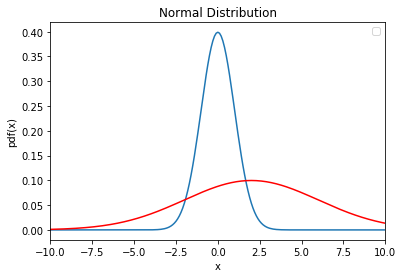

In [16]:
showDistribution(stats.norm, stats.norm(loc=2, scale=4),
                 'Normal Distribution', 'x', 'pdf(x)','')

#### Exponential distribution

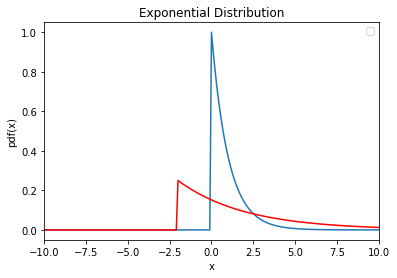

In [21]:
showDistribution(stats.expon, stats.expon(loc=-2, scale=4),
                 'Exponential Distribution', 'x', 'pdf(x)','')

#### Students' T-distribution

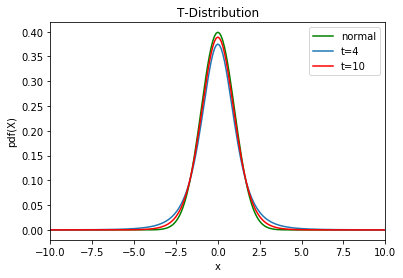

In [22]:
# ... with 4, and with 10 degrees of freedom (DOF)
plt.plot(x, stats.norm.pdf(x), 'g')
showDistribution(stats.t(4), stats.t(10),
                 'T-Distribution', 'x', 'pdf(X)',['normal', 't=4', 't=10'])

#### Uniform distribution

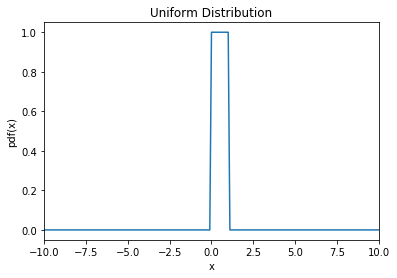

In [23]:
showDistribution(stats.uniform,'' ,
                 'Uniform Distribution', 'x', 'pdf(x)','')

#### Logistic distribution

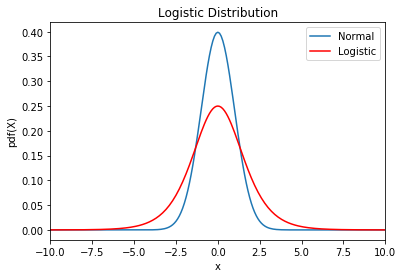

In [24]:
showDistribution(stats.norm, stats.logistic,
                 'Logistic Distribution', 'x', 'pdf(X)',['Normal', 'Logistic'])

#### Lognormal distribution

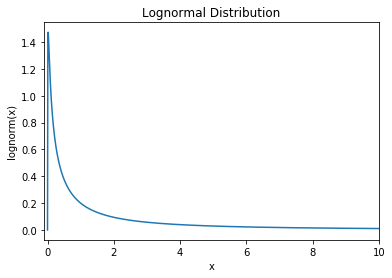

In [25]:
x = np.logspace(-9,1,1001)+1e-9
showDistribution(stats.lognorm(2), '',
                 'Lognormal Distribution', 'x', 'lognorm(x)','', xmin=-0.1)

##### Discrete Distribution Functions

- Binomial distribution - https://en.wikipedia.org/wiki/Binomial_distribution
- Poisson distribution (PMF, CDF, and PPF) - https://en.wikipedia.org/wiki/Poisson_distribution

#### Binomial Distribution

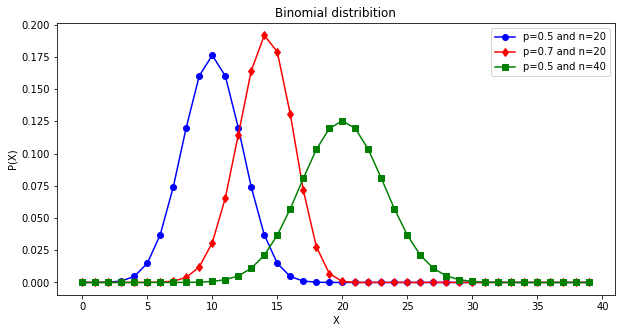

In [26]:
bd1 = stats.binom(20, 0.5)
bd2 = stats.binom(20, 0.7)
bd3 = stats.binom(40, 0.5)
k = np.arange(40)

plt.figure(figsize=(10, 5))
plt.plot(k, bd1.pmf(k), 'o-b')
plt.plot(k, bd2.pmf(k), 'd-r')
plt.plot(k, bd3.pmf(k), 's-g')
plt.title('Binomial distribition')
plt.legend(['p=0.5 and n=20', 'p=0.7 and n=20', 'p=0.5 and n=40'])
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()

#### Poisson Distribution

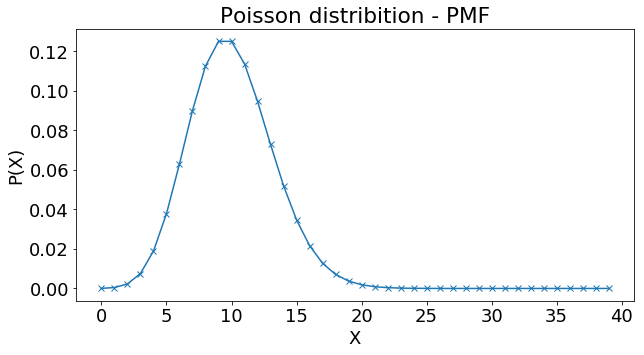

In [48]:
pd = stats.poisson(10)

plt.figure(figsize=(10, 5))
plt.plot(k, pd.pmf(k),'x-')
plt.title('Poisson distribition - PMF')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()

#### Different Views of the Poisson Distrubution

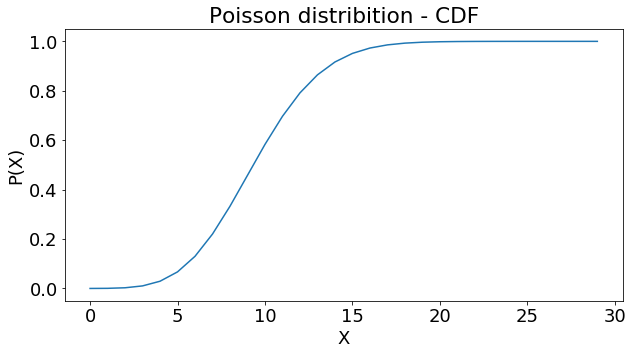

In [49]:
k = np.arange(30)

plt.figure(figsize=(10, 5))
plt.plot(k, pd.cdf(k))
plt.title('Poisson distribition - CDF')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()

### c) Exploring Normal Distribution

* https://en.wikipedia.org/wiki/Normal_distribution

In [19]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png')

In [30]:
# seaborn is a package for the visualization of statistical data
import pandas as pd
import seaborn as sns
sns.set(style='ticks')

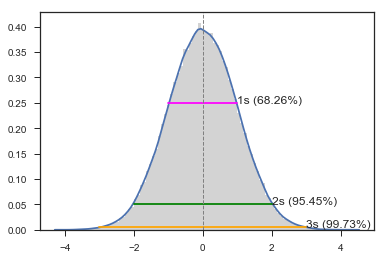

In [31]:
# Create a random standard normal distribution
df = pd.DataFrame(np.random.randn(100000, 1), columns=['Grade'])

# Plot the distribution as a histogram with a density curve
grade = df['Grade']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, color='lightgrey', normed=True, bins=100)  
plt.plot(x, density(x))

# Get the mean and standard deviation
s = df['Grade'].std()
m = df['Grade'].mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = [0.25, 0.25]
plt.plot(x1,y1, color='magenta')
plt.annotate('1s (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = [0.05, 0.05]
plt.plot(x2,y2, color='green')
plt.annotate('2s (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = [0.005, 0.005]
plt.plot(x3,y3, color='orange')
plt.annotate('3s (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(grade.mean(), color='grey', linestyle='dashed', linewidth=1)

plt.show()

In [32]:
prob_under_minus1 = stats.norm.cdf(x=-1, loc=0, scale=1)     

prob_over_1 = 1 - stats.norm.cdf(x=1, loc=0, scale=1) 

between_prob = 1 - (prob_under_minus1 + prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


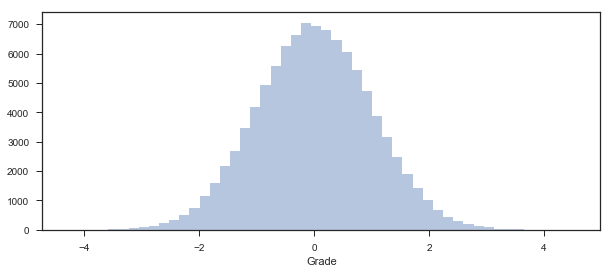

In [33]:
plt.figure(figsize=(10, 4))
sns.distplot(df['Grade'],kde=False)
plt.show()

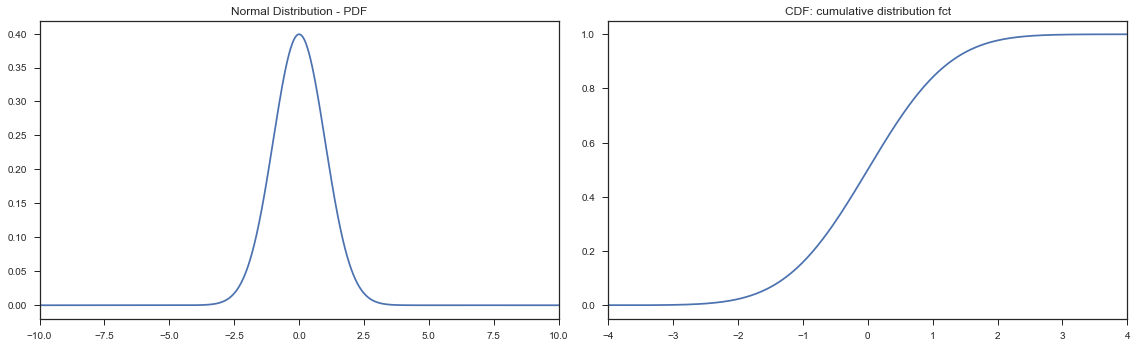

In [34]:
''' Different aspects of a normal distribution'''
# Generate the data
x = np.linspace(-10, 10, 1000)
rv = stats.norm(0,1)   # random variate

plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.plot(x,rv.pdf(x))
plt.xlim([-10,10])
plt.title('Normal Distribution - PDF')

plt.subplot(122)
plt.plot(x,rv.cdf(x))
plt.xlim([-4,4])
plt.title('CDF: cumulative distribution fct')
plt.tight_layout()
plt.show()
    

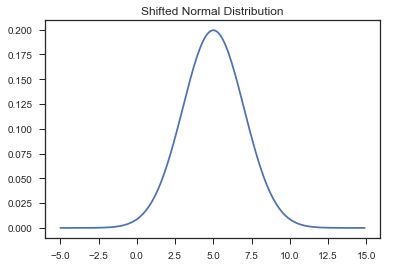

In [35]:
# Generate the data
x = np.arange(-5,15,0.1)

# Plot a normal distribution: "Probability density functions"
myMean = 5
mySD = 2

y = stats.norm.pdf(x, myMean, mySD)
plt.plot(x,y)
plt.title('Shifted Normal Distribution')
plt.show()

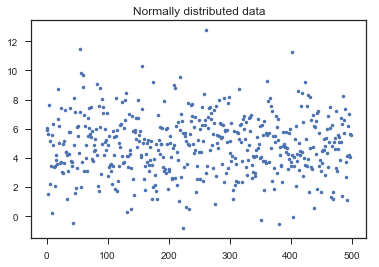

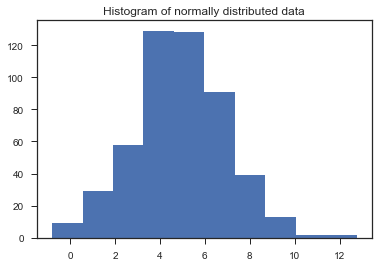

In [36]:
# Generating random numbers with a normal distribution
numData = 500
data = stats.norm.rvs(myMean, mySD, size = numData)

plt.plot(data, '.')
plt.title('Normally distributed data')
plt.show()

plt.hist(data)
plt.title('Histogram of normally distributed data')
plt.show()

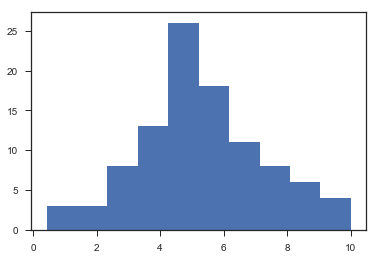

In [37]:
'''Check if the distribution is normal.'''
# Generate and show a distribution
numData = 100
data = stats.norm.rvs(myMean, mySD, size=numData)
plt.hist(data)
plt.show()

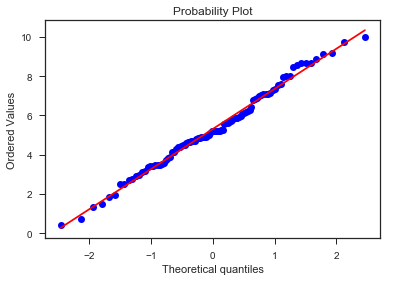

In [38]:
# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
_ = stats.probplot(data, plot=plt)
plt.show()

### c) Hypothesis Testing

When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. Hypothesis tests are used to test the validity of a claim that is made about a population. This claim that’s on trial, in essence, is called the null hypothesis.

The alternative hypothesis is the one you would believe if the null hypothesis is concluded to be untrue. The evidence in the trial is your data and the statistics that go along with it. All hypothesis tests ultimately use a p-value to weigh the strength of the evidence (what the data are telling you about the population). The p-value is a number between 0 and 1 and interpreted in the following way:

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

* p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.


* https://en.wikipedia.org/wiki/Normal_distribution

In [86]:
# The scipy "normaltest" is based on D’Agostino and Pearson’s test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVal = stats.normaltest(data)

# Or you can check for normality with Kolmogorov-Smirnov test: but this is only advisable for large sample numbers!
#_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

if pVal > 0.05:
    print('Data are probably normally distributed')


Data are probably normally distributed


###### Simulating Central Limit Theorem

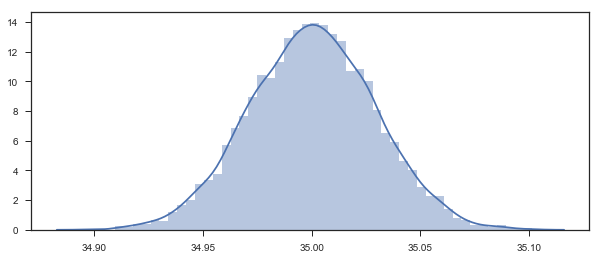

In [87]:
N = 10000

sim = np.zeros(N)
for i in range(N):
    sim[i] = np.random.uniform(30, 40, N).mean()

plt.figure(figsize=(10, 4))
sns.distplot(sim,kde=True)
plt.show()

In [88]:
stats.normaltest(sim)

NormaltestResult(statistic=0.1363922024168671, pvalue=0.9340772819319919)

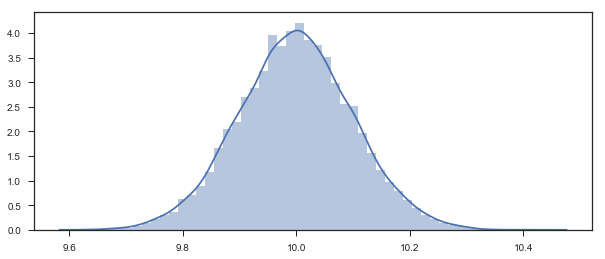

In [89]:
N = 10000

sim = np.zeros(N)
for i in range(N):
    sim[i] = np.random.exponential(10, N).mean()

plt.figure(figsize=(10, 4))
sns.distplot(sim,kde=True)
plt.show()

In [90]:
stats.normaltest(sim)

NormaltestResult(statistic=0.7412347916732087, pvalue=0.6903080057565648)